In [18]:
import psycopg2
import pandas as pd
import pandas.io.sql as sqlio
import matplotlib.pyplot as plt

In [2]:
#leaving passingword empty for now
conn = psycopg2.connect(user="postgres", password="", host="localhost", database="temporary_database")

In [3]:
#define query
query = "select * from heart_df"

In [4]:
#execute query and save it to a variable
heart_df = sqlio.read_sql_query(query,conn)

In [5]:
heart_df

,age,sex,chestpaintype,restingbp,cholesterol,fastingbs,restingecg,maxhr,exerciseangina,oldpeak,st_slope,heartdisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [6]:
# Find if there are any null values
for column in heart_df.columns:
    print(f"Column {column} has {heart_df[column].isnull().sum()} null values")

Column age has 0 null values
Column sex has 0 null values
Column chestpaintype has 0 null values
Column restingbp has 0 null values
Column cholesterol has 0 null values
Column fastingbs has 0 null values
Column restingecg has 0 null values
Column maxhr has 0 null values
Column exerciseangina has 0 null values
Column oldpeak has 0 null values
Column st_slope has 0 null values
Column heartdisease has 0 null values


In [7]:
# Generate our categorical variable list
heart_cat = heart_df.dtypes[heart_df.dtypes == "object"].index.tolist()

# Check the number of unique values in each column
heart_df[heart_cat].nunique()

sex               2
chestpaintype     4
restingecg        3
exerciseangina    2
st_slope          3
dtype: int64

In [8]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
import pandas as pd
import tensorflow as tf

In [9]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(heart_df[heart_cat]))

# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names(heart_cat)
encode_df.head()

C:\Users\yutac\.conda\envs\mlenv\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,sex_F,sex_M,chestpaintype_ASY,chestpaintype_ATA,chestpaintype_NAP,chestpaintype_TA,restingecg_LVH,restingecg_Normal,restingecg_ST,exerciseangina_N,exerciseangina_Y,st_slope_Down,st_slope_Flat,st_slope_Up
0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
2,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
3,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
4,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0


In [10]:
# Merge one-hot encoded features and drop the originals
heart_df = heart_df.merge(encode_df,left_index=True, right_index=True)
heart_df = heart_df.drop(heart_cat,1)
heart_df.head()

C:\Users\yutac\.conda\envs\mlenv\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until


,age,restingbp,cholesterol,fastingbs,maxhr,oldpeak,heartdisease,sex_F,sex_M,chestpaintype_ASY,...,chestpaintype_NAP,chestpaintype_TA,restingecg_LVH,restingecg_Normal,restingecg_ST,exerciseangina_N,exerciseangina_Y,st_slope_Down,st_slope_Flat,st_slope_Up
0,40,140,289,0,172,0.0,0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
1,49,160,180,0,156,1.0,1,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
2,37,130,283,0,98,0.0,0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
3,48,138,214,0,108,1.5,1,1.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
4,54,150,195,0,122,0.0,0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0


In [11]:
# Remove loan status target from features data
y = heart_df.heartdisease.values
X = heart_df.copy()
X = X.drop("heartdisease", axis=1)

# Split training/test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [12]:
# Trying Logistic regression
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(solver='lbfgs',
   max_iter=200,
   random_state=1)

classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

C:\Users\yutac\.conda\envs\mlenv\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


0.8826086956521739


In [13]:
from sklearn.metrics import confusion_matrix
from imblearn.metrics import classification_report_imbalanced

In [14]:
# Display the confusion matrix
confusion_matrix(y_test, y_pred)

array([[ 86,  17],
       [ 10, 117]], dtype=int64)

In [16]:
importances = pd.DataFrame(data={
    'Attribute': X_train.columns,
    'Importance': classifier.coef_[0]
})
importances = importances.sort_values(by='Importance', ascending=False)

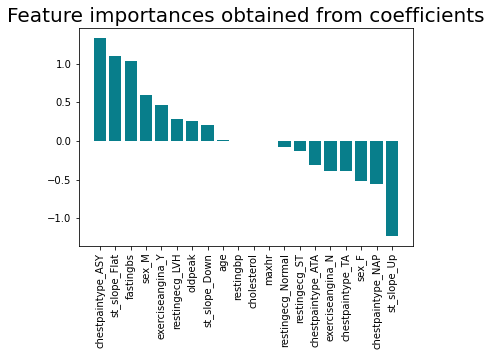

In [19]:
plt.bar(x=importances['Attribute'], height=importances['Importance'], color='#087E8B')
plt.title('Feature importances obtained from coefficients', size=20)
plt.xticks(rotation='vertical')
plt.show()